In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
from xgboost.sklearn import XGBClassifier

In [2]:
train_set = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data', header = None)

test_set = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.test' , skiprows = 1, header = None)


In [3]:
col_labels = ['age', 'workclass', 'fnlwgt', 'education', 'education_num',
                'marital_status', 'occupation','relationship', 'race', 'sex', 'capital_gain',
                'capital_loss', 'hours_per_week', 'native_country', 'wage_class']

In [4]:
train_set.columns = col_labels
test_set.columns = col_labels

In [5]:
 train_set.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,wage_class
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [6]:
test_set.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,wage_class
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K.
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K.
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K.
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K.
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K.


In [7]:
train_set.isnull().any()

age               False
workclass         False
fnlwgt            False
education         False
education_num     False
marital_status    False
occupation        False
relationship      False
race              False
sex               False
capital_gain      False
capital_loss      False
hours_per_week    False
native_country    False
wage_class        False
dtype: bool

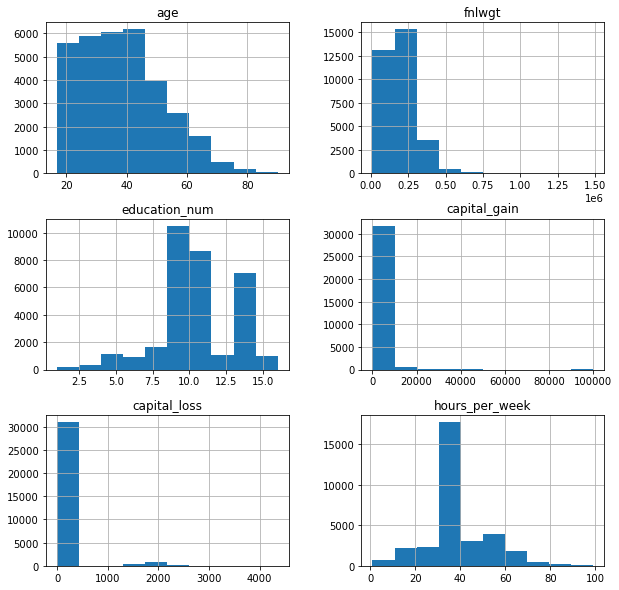

In [8]:
train_set.hist(figsize=(10,10))
plt.show()

In [9]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education_num   32561 non-null  int64 
 5   marital_status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital_gain    32561 non-null  int64 
 11  capital_loss    32561 non-null  int64 
 12  hours_per_week  32561 non-null  int64 
 13  native_country  32561 non-null  object
 14  wage_class      32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [10]:
train_set.workclass.value_counts()

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: workclass, dtype: int64

In [11]:
train_set.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education_num',
       'marital_status', 'occupation', 'relationship', 'race', 'sex',
       'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
       'wage_class'],
      dtype='object')

In [12]:
import re 
train_set.rename(columns=lambda name: re.sub(r"\-",'_',name), inplace=True)

In [13]:
filter1 = train_set["workclass"]=="?"
index = train_set[train_set["native_country"]== ' ?'].index
index.value_counts().sum()

583

In [15]:
indexes_list = []
def filter_questionMark(l):
    for item in l:
        print('_'*10,item, '_'*10)
        index = train_set[train_set[item]== ' ?'].index
        indexes_list.append(index)
        print("Total `?` in {0}: {1}".format(item, index.value_counts().sum()))  
        print("Total % of `?` in {0}: {1}".format(item, round((index.value_counts().sum()/train_set.shape[0])*100,2)))
        
filter2= ['workclass','occupation', 'native_country']
filter_questionMark(filter2)

__________ workclass __________
Total `?` in workclass: 1836
Total % of `?` in workclass: 5.64
__________ occupation __________
Total `?` in occupation: 1843
Total % of `?` in occupation: 5.66
__________ native_country __________
Total `?` in native_country: 583
Total % of `?` in native_country: 1.79


In [16]:
print("Original Shape of Train Set:", train_set.shape)
print("Rows in Train Set:", train_set.shape[0])

Original Shape of Train Set: (32561, 15)
Rows in Train Set: 32561


In [27]:
print('\n Drowping `?` indexes from `workclass` featutre....')
train_set= train_set.drop(index)
print("Total New rows:",train_set.shape[0])


 Drowping `?` indexes from `workclass` featutre....


KeyError: '[   14    38    51    61    93   245   249   297   393   453   557   712\n   725   729   777   780   887   955  1026  1036  1115  1152  1158  1199\n  1224  1252  1326  1348  1391  1554  1557  1581  1593  1676  1711  1738\n  1818  1900  1990  2015  2099  2104  2181  2371  2512  2513  2518  2549\n  2572  2587  2591  2639  2717  2735  2775  2794  2909  2926  3023  3107\n  3131  3164  3166  3187  3200  3232  3247  3256  3461  3484  3495  3532\n  3579  3636  3834  3856  3858  4006  4156  4172  4197  4244  4301  4326\n  4396  4405  4462  4510  4578  4599  4639  4656  4658  4671  4772  4786\n  4827  5081  5180  5185  5201  5234  5309  5347  5374  5401  5450  5540\n  5647  5663  5683  5709  5823  5841  5854  5963  6005  6059  6129  6176\n  6186  6242  6319  6360  6364  6376  6395  6533  6676  6737  6844  7045\n  7072  7080  7096  7153  7166  7176  7253  7284  7327  7345  7398  7475\n  7615  7634  7688  7850  7861  7862  7902  7964  7990  8145  8160  8207\n  8225  8282  8356  8365  8477  8871  8903  8915  9015  9040  9237  9366\n  9418  9503  9537  9559  9580  9616  9624  9739  9785  9799  9849  9866\n  9985 10011 10062 10182 10184 10218 10288 10343 10353 10403 10408 10574\n 10634 10647 10674 10762 10777 10782 11147 11187 11221 11284 11300 11423\n 11446 11477 11595 11614 11652 11659 11983 11988 12004 12082 12114 12172\n 12260 12280 12315 12329 12362 12470 12560 12643 12655 12690 12695 12716\n 12748 12830 12899 12959 12973 12996 13088 13198 13201 13281 13305 13499\n 13603 13691 13747 13768 13817 13820 13826 13827 13897 13913 13918 13971\n 14043 14085 14102 14195 14234 14246 14340 14368 14410 14459 14562 14577\n 14582 14584 14592 14857 15023 15036 15136 15152 15161 15197 15219 15444\n 15475 15528 15594 15609 15613 15672 15678 15692 15734 15792 15863 15931\n 15932 15953 15988 16036 16079 16108 16141 16142 16231 16260 16266 16328\n 16381 16417 16439 16488 16500 16635 16647 16838 16862 16975 17021 17107\n 17193 17201 17274 17378 17452 17481 17482 17623 17647 17894 18065 18233\n 18277 18365 18412 18438 18459 18555 18585 18615 18672 18677 18906 18909\n 18982 19037 19046 19055 19169 19245 19256 19299 19316 19326 19346 19351\n 19414 19490 19532 19626 19676 19709 19727 19768 19784 19787 19946 19997\n 20203 20284 20333 20358 20464 20480 20499 20531 20632 20638 20657 20658\n 20716 20747 20847 21062 21108 21126 21134 21195 21226 21264 21382 21393\n 21531 21541 21556 21668 21722 21818 22002 22068 22106 22230 22241 22264\n 22317 22351 22429 22474 22540 22561 22614 22639 22677 22742 22771 22788\n 22790 22861 22907 22981 23032 23115 23173 23236 23284 23434 23440 23466\n 23470 23565 23637 23687 23704 23729 23784 23797 23892 23915 24213 24457\n 24465 24572 24592 24606 24662 24695 24750 24832 24890 24891 24923 24960\n 24980 25046 25105 25112 25235 25241 25275 25296 25313 25342 25359 25458\n 25478 25491 25504 25549 25574 25619 25629 25841 25870 26007 26197 26221\n 26234 26271 26296 26332 26363 26377 26405 26446 26460 26569 26616 26661\n 26762 26800 26900 26922 26940 26979 27019 27068 27133 27141 27299 27305\n 27376 27383 27669 28018 28044 28107 28124 28194 28195 28196 28220 28335\n 28343 28431 28482 28500 28505 28589 28618 28628 28688 28705 28835 28841\n 28912 28932 28937 29029 29033 29098 29104 29212 29255 29323 29357 29377\n 29401 29440 29523 29592 29680 29682 29738 29777 29786 29888 29981 30010\n 30105 30110 30170 30230 30274 30276 30302 30329 30369 30582 30638 30656\n 30670 30700 30773 30821 30902 30922 31089 31128 31336 31359 31387 31396\n 31468 31555 31637 31641 31701 31796 31944 32090 32169 32213 32232 32254\n 32307 32413 32449 32469 32492 32510 32525] not found in axis'

In [21]:
print('\n Drowping `?` indexes from `native_country` feature....')
index1= train_set[train_set["native_country"]== ' ?'].index
train_set = train_set.drop(index1)
print("Total New rows:",train_set.shape[0])


 Drowping `?` indexes from `native_country` feature....
Total New rows: 30162


In [22]:
print('\n Drowping `?` indexes from `occupation` featue....')
index2 = train_set[train_set["occupation"]== ' ?'].index
train_set = train_set.drop(index2)
print("Total New rows:",train_set.shape[0])


 Drowping `?` indexes from `occupation` featue....
Total New rows: 30162


In [ ]:
filter_questionMark(filter2)